Constant Oracle Results: {'000': 1024}
Balanced Oracle Results: {'111': 1024}


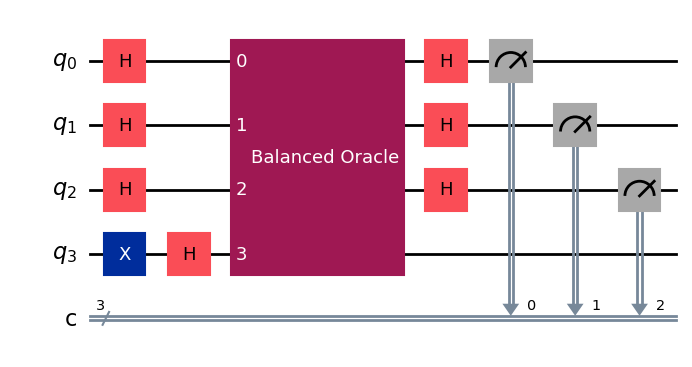

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

def deutsch_jozsa(n, oracle):
    """ Deutsch-Jozsa algorithm for n-qubits """
    qc = QuantumCircuit(n + 1, n)      
    qc.x(n)  
    qc.h(range(n + 1))
    qc.append(oracle, range(n + 1))
    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

# Oracle for a constant function
def constant_oracle(n):
    """ Constant oracle: does nothing """
    oracle = QuantumCircuit(n + 1)
    return oracle.to_gate(label="Constant Oracle")

# Oracle for a balanced function
def balanced_oracle(n):
    """ Balanced oracle: flips auxiliary qubit based on input """
    oracle = QuantumCircuit(n + 1)
    for i in range(n):
        oracle.cx(i, n)  
    return oracle.to_gate(label="Balanced Oracle")

n = 3 
oracles = {"Constant": constant_oracle(n), "Balanced": balanced_oracle(n)}
results = {}
backend = Aer.get_backend('aer_simulator')  # Usar 'aer_simulator' en lugar de 'qasm_simulator'

for name, oracle in oracles.items():
    qc = deutsch_jozsa(n, oracle)
    transpiled_qc = transpile(qc, backend)    
    result = backend.run(transpiled_qc, shots=1024).result()
    counts = result.get_counts()
    results[name] = counts
    print(f"{name} Oracle Results:", counts)

qc.draw("mpl")
